In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats

pd.set_option('display.max_columns', 100)
pd.set_option("display.max_columns", 100)

#import warnings
#warnings.simplefilter(action='ignore',)

In [2]:
#url = 'https://data.amerigeoss.org/de/dataset/opportunity-zones/resource/cae2a7de-c446-4cb7-af19-c0f99d7cd787'
opportunity = pd.read_excel("../../Data/designated-QOppZones.12.14.18.xlsx")
opportunity.head()

,Unnamed: 0,Designated Qualified Opportunity Zones,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"This document was updated December 14, 2018, t...",NaN,NaN,NaN,NaN
1,Please note that the below list of designated ...,NaN,NaN,NaN,NaN
2,Bulletin at a later date.,NaN,NaN,NaN,NaN
3,Click arrow to filter state\n\nState,County,Census Tract Number,Tract Type,ACS Data Source
4,Alabama,Autauga,01001020700,Low-Income Community,2011-2015


In [3]:
opportunity.columns = opportunity.iloc[3]
opportunity.head()

3,Click arrow to filter state\n\nState,County,Census Tract Number,Tract Type,ACS Data Source
0,"This document was updated December 14, 2018, t...",NaN,NaN,NaN,NaN
1,Please note that the below list of designated ...,NaN,NaN,NaN,NaN
2,Bulletin at a later date.,NaN,NaN,NaN,NaN
3,Click arrow to filter state\n\nState,County,Census Tract Number,Tract Type,ACS Data Source
4,Alabama,Autauga,01001020700,Low-Income Community,2011-2015


In [4]:
opportunity = opportunity[4:]
opportunity.head()

3,Click arrow to filter state\n\nState,County,Census Tract Number,Tract Type,ACS Data Source
4,Alabama,Autauga,01001020700,Low-Income Community,2011-2015
5,Alabama,Baldwin,01003010200,Low-Income Community,2011-2015
6,Alabama,Baldwin,01003010400,Non-LIC Contiguous,2011-2015
7,Alabama,Baldwin,01003010500,Low-Income Community,2011-2015
8,Alabama,Baldwin,01003010600,Low-Income Community,2011-2015


In [5]:
print(len(opportunity['Click arrow to filter state\n\nState'].unique()))
opportunity['Click arrow to filter state\n\nState'].unique()

56


array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Northern Mariana Islands',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [6]:
opportunity.isnull().sum()

3
Click arrow to filter state\n\nState    0
County                                  0
Census Tract Number                     0
Tract Type                              0
ACS Data Source                         0
dtype: int64

In [7]:
sepher = pd.read_csv('../../Data/sepher2.0_cleaned.csv')
sepher.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,FIPS,NAME,PARENT.LOCATION,COUNTY,POPULATION_2000,POVERTY.RATE_2000,PCT.RENTER.OCCUPIED_2000,MEDIAN.GROSS.RENT_2000,MEDIAN.HOUSEHOLD.INCOME_2000,MEDIAN.PROPERTY.VALUE_2000,RENT.BURDEN_2000,PCT.WHITE_2000,PCT.AF.AM_2000,PCT.HISPANIC_2000,PCT.AM.IND_2000,PCT.ASIAN_2000,PCT.NH.PI_2000,PCT.OTHER_2000,PCT.MULTIPLE_2000,RENTER.OCCUPIED.HOUSEHOLDS_2000,EVICTIONS_2000,EVICTION.FILINGS_2000,EVICTION.RATE_2000,EVICTION.FILING.RATE_2000,IMPUTED_2000,SUBBED_2000,LOW.FLAG_2000,POPULATION_2001,POVERTY.RATE_2001,PCT.RENTER.OCCUPIED_2001,MEDIAN.GROSS.RENT_2001,MEDIAN.HOUSEHOLD.INCOME_2001,MEDIAN.PROPERTY.VALUE_2001,RENT.BURDEN_2001,PCT.WHITE_2001,PCT.AF.AM_2001,PCT.HISPANIC_2001,PCT.AM.IND_2001,PCT.ASIAN_2001,PCT.NH.PI_2001,PCT.OTHER_2001,PCT.MULTIPLE_2001,RENTER.OCCUPIED.HOUSEHOLDS_2001,EVICTIONS_2001,EVICTION.FILINGS_2001,EVICTION.RATE_2001,EVICTION.FILING.RATE_2001,IMPUTED_2001,SUBBED_2001,LOW.FLAG_2001,...,VLCN_HLRP,VLCN_HLRR,VLCN_EALB,VLCN_EALP,VLCN_EALPE,VLCN_EALT,VLCN_EALS,VLCN_EALR,VLCN_RISKS,VLCN_RISKR,WFIR_AFREQ,WFIR_EXPB,WFIR_EXPP,WFIR_EXPPE,WFIR_EXPA,WFIR_EXPT,WFIR_HLRB,WFIR_HLRP,WFIR_HLRA,WFIR_HLRR,WFIR_EALB,WFIR_EALP,WFIR_EALPE,WFIR_EALA,WFIR_EALT,WFIR_EALS,WFIR_EALR,WFIR_RISKS,WFIR_RISKR,WNTW_EVNTS,WNTW_AFREQ,WNTW_EXPB,WNTW_EXPP,WNTW_EXPPE,WNTW_EXPA,WNTW_EXPT,WNTW_HLRB,WNTW_HLRP,WNTW_HLRA,WNTW_HLRR,WNTW_EALB,WNTW_EALP,WNTW_EALPE,WNTW_EALA,WNTW_EALT,WNTW_EALS,WNTW_EALR,WNTW_RISKS,WNTW_RISKR,NRI_VER
0,01001020100GID,201.0,"AUTAUGA COUNTY, ALABAMA",AUTAUGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NOT APPLICABLE,NaN,NaN,NaN,NaN,NaN,NOT APPLICABLE,NaN,NOT APPLICABLE,0.000206,0.000000e+00,0.000000,0.000000e+00,0.00000,0.000000e+00,0.4,0.00053,0.013579,NO RATING,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NO EXPECTED ANNUAL LOSSES,0.000000,NO RATING,7.0,0.576606,2.050360e+08,1912.0,1.453120e+10,59393.420222,1.473630e+10,6.145960e-07,1.650335e-08,0.00002,VERY LOW,72.660643,0.000018,138.277987,0.689440,211.628070,9.486085,RELATIVELY LOW,4.796215,RELATIVELY LOW,JULY 2021
1,01001020200GID,202.0,"AUTAUGA COUNTY, ALABAMA",AUTAUGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NOT APPLICABLE,NaN,NaN,NaN,NaN,NaN,NOT APPLICABLE,NaN,NOT APPLICABLE,0.000122,0.000000e+00,0.000000,0.000000e+00,0.00000,0.000000e+00,0.4,0.00053,0.013579,NO RATING,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NO EXPECTED ANNUAL LOSSES,0.000000,NO RATING,7.0,0.576606,1.984870e+08,2170.0,1.649200e+10,4318.911411,1.669049e+10,6.145960e-07,1.650335e-08,0.00002,VERY LOW,70.339809,0.000021,156.936837,0.050134,227.326779,9.715074,RELATIVELY LOW,5.182190,RELATIVELY LOW,JULY 2021
2,01001020300GID,203.0,"AUTAUGA COUNTY, ALABAMA",AUTAUGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NOT APPLICABLE,NaN,NaN,NaN,NaN,NaN,NOT APPLICABLE,NaN,NOT APPLICABLE,0.000103,1.492649e+06,16.056675,1.220307e+08,2650.16065,1.235260e+08,0.4,0.00053,0.013579,VERY LOW,160.472029,0.000002,17.437347,0.008287,177.917663,2.280426,VERY LOW,2.127945,VERY LOW,7.0,0.576606,3.181160e+08,3373.0,2.563480e+10,40638.863212,2.595296e+10,6.145960e-07,1.650335e-08,0.00002,VERY LOW,112.733925,0.000032,243.939148,0.471737,357.144809,11.293903,RELATIVELY LOW,6.491547,RELATIVELY LOW,JULY 2021
3,01001020400GID,204.0,"AUTAUGA COUNTY, ALABAMA",AUTAUGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NOT APPLICABLE,NaN,NaN,NaN,NaN,NaN,NOT APPLICABLE,NaN,NOT APPLICABLE,0.000109,0.000000e+00,0.000000,0.000000e+00,0.00000,0.000000e+0

In [8]:
sepher.isnull().sum()

FIPS                   0
NAME               48689
PARENT.LOCATION    48689
COUNTY             13718
POPULATION_2000    79940
                   ...  
WNTW_EALS          13718
WNTW_EALR          13718
WNTW_RISKS         14010
WNTW_RISKR         13718
NRI_VER            13718
Length: 1664, dtype: int64

In [9]:
sepher.dtypes

FIPS                object
NAME               float64
PARENT.LOCATION     object
COUNTY              object
POPULATION_2000    float64
                    ...   
WNTW_EALS          float64
WNTW_EALR           object
WNTW_RISKS         float64
WNTW_RISKR          object
NRI_VER             object
Length: 1664, dtype: object

In [17]:
sepher.isnull().sum()

FIPS                   0
NAME               48689
PARENT.LOCATION    48689
COUNTY             13718
POPULATION_2000    79940
                   ...  
WNTW_EALS          13718
WNTW_EALR          13718
WNTW_RISKS         14010
WNTW_RISKR         13718
NRI_VER            13718
Length: 1664, dtype: int64

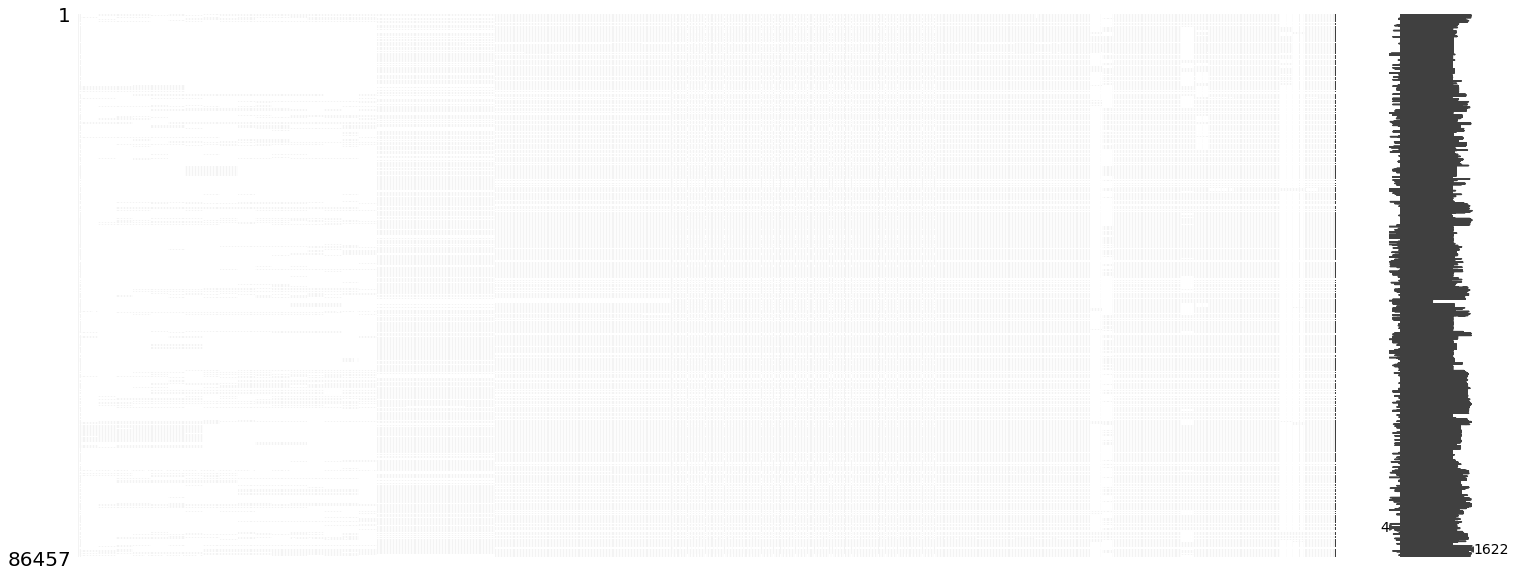

In [10]:
msno.matrix(sepher);